Noah Tanner, Kosimo Tonn
Lab 0x02 - ME405
Professor Refvem
Fall 2023

Python Motor Data Processing:

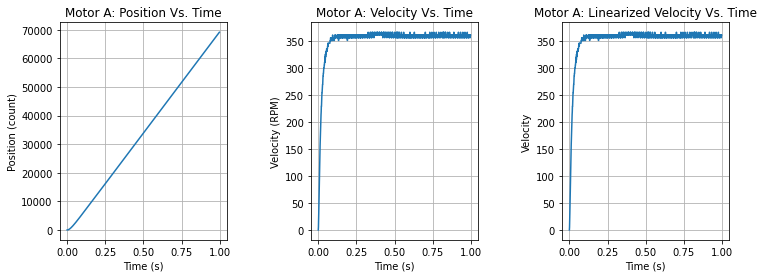

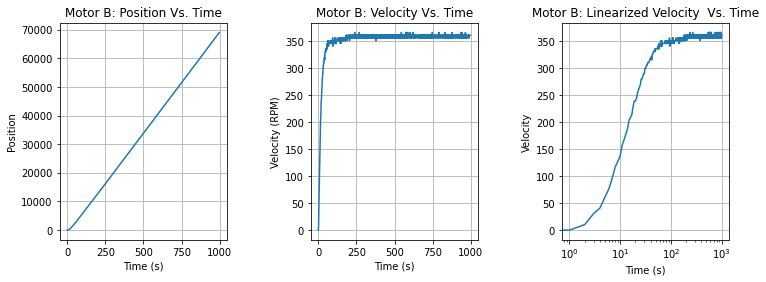

In [17]:
from matplotlib import pyplot
import math

x_values = []
t_values = []
u_values = []
adj_u_values = []
file = open('motor1_data.csv', mode = 'r')


header = file.readline().strip().split(',')

for line in file:
    data = line.strip().split(',')
    try:
        t = float(data[0])
        x = float(data[1])
        u = float(data[2])
        u = u*305/60
        t = t/1000
        x_values.append(x)
        t_values.append(t)
        u_values.append(u)
    except ValueError:
        continue

adj_u_values = u_values
for i in adj_u_values:
     #print(i)
     i = math.log(1-i/16876)

# motor a subplots
mot_a_fig, mot_a_axes = pyplot.subplots( 1,3, figsize=(12, 4) )
# plot 1: Motor A position (count) vs time (s)
mot_a_axes[0].plot(t_values, x_values)
mot_a_axes[0].set_xlabel("Time (s)")
mot_a_axes[0].set_ylabel('Position (count)')
mot_a_axes[0].set_title("Motor A: Position Vs. Time")
mot_a_axes[0].grid(True)

# plot 2: Motor A velocity (RPM) vs time (s)
mot_a_axes[1].plot(t_values, u_values)
mot_a_axes[1].set_xlabel("Time (s)")
mot_a_axes[1].set_ylabel("Velocity (RPM)")
mot_a_axes[1].set_title("Motor A: Velocity Vs. Time")
mot_a_axes[1].grid(True)

# plot 3: Motor A: Linearized Velcity (RPM) vs time (s)
mot_a_axes[2].plot(t_values, adj_u_values)
mot_a_axes[2].set_xlabel("Time (s)")
mot_a_axes[2].set_ylabel("Velocity")
mot_a_axes[2].set_title("Motor A: Linearized Velocity Vs. Time")
mot_a_axes[2].grid(True)

# show plot a
pyplot.subplots_adjust(wspace=0.5)
pyplot.show()

x_values = []
t_values = []
u_values = []

file = open('motor2_data.csv', mode = 'r')


header = file.readline().strip().split(',')

for line in file:
    data = line.strip().split(',')
    try:
        t = float(data[0])
        x = float(data[1])
        u = float(data[2])
        u = u*305/60        
        x_values.append(x)
        t_values.append(t)
        u_values.append(u)
    except ValueError:
        continue

# motor b subplots
mot_b_fig, mot_b_axes = pyplot.subplots( 1,3, figsize=(12, 4) )

# plot 4: Motor B: Position (counts) vs time (s)
mot_b_axes[0].plot(t_values, x_values)
mot_b_axes[0].set_xlabel("Time (s)")
mot_b_axes[0].set_ylabel(header[1])
mot_b_axes[0].set_title("Motor B: Position Vs. Time")
mot_b_axes[0].grid(True)

# plot 5: Motor B velocity (RPM) vs time (s)
mot_b_axes[1].plot(t_values, u_values)
mot_b_axes[1].set_xlabel("Time (s)")
mot_b_axes[1].set_ylabel("Velocity (RPM)")
mot_b_axes[1].set_title("Motor B: Velocity Vs. Time")
mot_b_axes[1].grid(True)

# plot 6: Motor B: Linearized Velcity (RPM) vs time (s)
mot_b_axes[2].semilogx(t_values, u_values)
mot_b_axes[2].set_xlabel("Time (s)")
mot_b_axes[2].set_ylabel("Velocity")
mot_b_axes[2].set_title("Motor B: Linearized Velocity  Vs. Time")
mot_b_axes[2].grid(True)

# show plot b
pyplot.subplots_adjust(wspace=0.5)
pyplot.show()

Discussion:

1. Consider the amount of intertia and friction in the system. Is all the friction linear viscous friction as we would hope for a good step response?

    Looking at our plots, we can see the effects of intertia and friction. In both Position Vs. Time plots, the very start of the line is not completely linear, there is a slight curvature to the line before it steadies out and becomes linear. This curved lag part at the start is the intertia of the system.
    As for the viscous friction, it is not the only force that is present. There is Coloumb friction as well that can be seen in the linearized velocity step response plots.

2. How would (or does) Coloumb friction affect the plot results?

    In the linearized plots for both motors, we would see a linear line. The gradual curve at the beginning of the plot illustrates the Coloumb friction as it takes a little bit of time to overcome the initiation of the motion. The point where the motor has overcome the intiation of the motor can be seen as the point in which the linear flattens out and becomes linear, around 10ms.

3. Comment on the sample rate of the system and its time constant. How fast should you sample a system relative to its time constant?

    To start answering this question, the velocity time constant must be determined first. Based on the delta values, a time constant of 0.018s was calculated. The same rate for the lab was 1000Hz, which is much higher than needed to measure the response. AFter resaerching signal processing, I learned about the Nyquist Frequency, a rule of thumb for signal processing that says the sample rate should be at least twice the highest frequency component you want to capture. 
    Applying the Nyquist Frequency equation to my data:

        f_nyquist = 1 / ( 2 * time_constant )
        f_nyquist = 1 / ( 2 * 0.018s )
        f_nyquist = 27.8 Hz
    
    Given this f_nyquist value, a sample rate of 1kHz is more than adequate for capturing the dynamics of the system with such a large time constant.

4. When we close the loop in the next lab using a feedback control system, how fast should we run the controller?

    When we close the loop in the next lab with a feedback control system, I am going to apply the Nyquist Frequency rules again. Since the PID logic is going to come from a host PC, the DC motor we use will be a determining factor in the frequency that we use. Based on this labs calculations, a sample rate of 1 kHz is more than adequate, and since the STM32 is capable of handling that, I will use that as a starting point and adjust it if needed.

5. When we get the term project and you will have a lot of hardware attatched to your motors, how will the performance change? Will this affect the rate at which your control loop or data collection must run?

    When we get to the term project, there might be hardware that has a higher f_nyquist than the DC motor we used in this lab. Understanding each component individually before combining them will allow me to determine which one will be the limiting factor in the sample rate. There is potential that at least one of the components could significantly impact the sample rate or control loop rate, and this will have to be considered. Based off of the addition of at least one actuator and one more sensor, I believe that a sample rate of 1kHz should be fine, considering that one DC motor required a sampler rate significantly lower than 1kHz.
    Another consideration that I am not sure if it will impact the sample or control loop rate would be the amount of hardware we have running. It will take time to run the code for each piece of hardware and collect the data, so if this is done in an inefficient way, our sample rate might be interfering with our data collection, however I am not sure how much of an effect this will have.